In [1]:
%matplotlib inline
from matplotlib.pyplot import imshow

from PIL import Image

import numpy as np

import skimage
import skimage.color as sc
from skimage import exposure

## Load an Iamge

<class 'numpy.ndarray'>
uint8
(320, 320, 3)


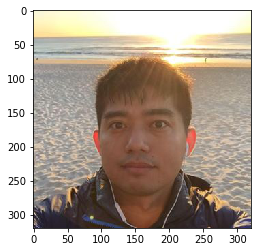

In [2]:
i = np.array(Image.open('img.jpg'))
imshow(i)
print(type(i))
print(i.dtype)
print(i.shape)

(320, 320)


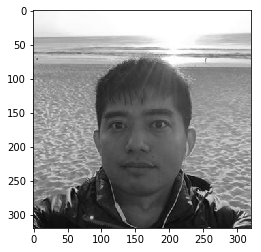

In [3]:
i_mono = sc.rgb2gray(i)
imshow(i_mono, cmap='gray')
print(i_mono.shape)

## Equalization

In [4]:
def im_hist(img):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8,6))
    fig.clf()
    ax = fig.gca()
    ax.hist(img.flatten(), bins = 256)
    plt.show()

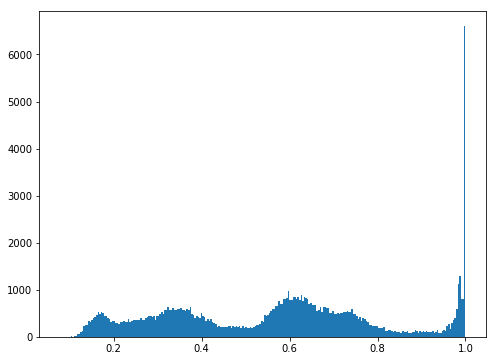

In [5]:
im_hist(i_mono)

In [6]:
def im_cdf(img):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8,6))
    fig.clf()
    ax = fig.gca()
    ax.hist(img.flatten(), bins = 256, cumulative=True)
    plt.show()

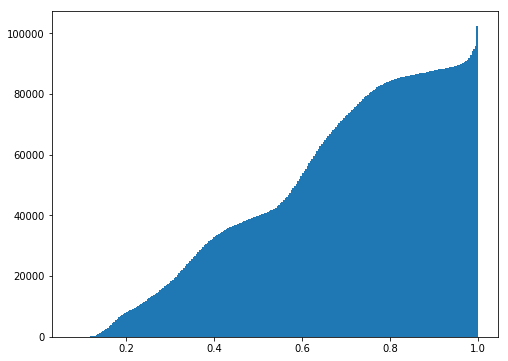

In [7]:
im_cdf(i_mono)

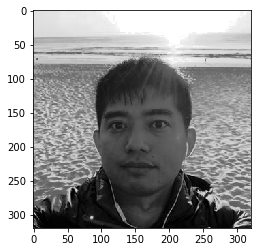

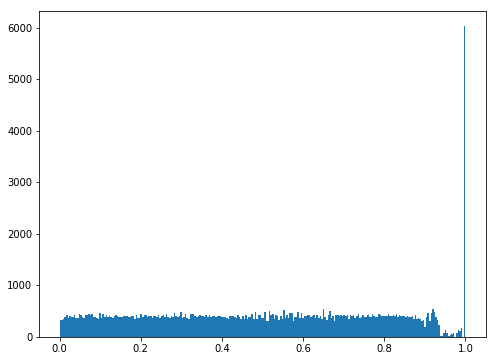

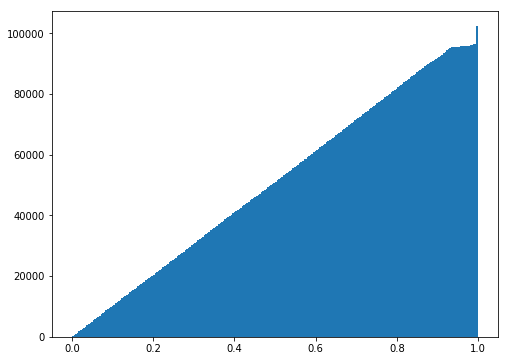

In [8]:
i_eq = exposure.equalize_hist(i_mono)
imshow(i_eq, cmap='gray')
im_hist(i_eq)
im_cdf(i_eq)

## De-noising with Filters

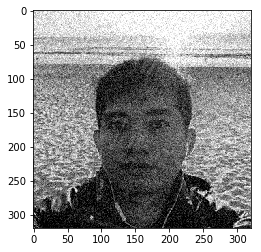

In [9]:
# add some noise
i_n = skimage.util.random_noise(i_eq)
imshow(i_n, cmap='gray')

In [10]:
# Use a Gaussian Filter
def gauss_filter(im, sigma = 10):
    from scipy.ndimage.filters import gaussian_filter as gf
    return gf(im, sigma = sigma)

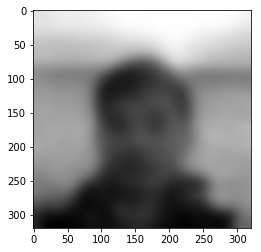

In [11]:
i_g = gauss_filter(i_n)
imshow(i_g, cmap='gray')

In [12]:
# Use a Median Filter
def med_filter(im, size = 10):
    from scipy.ndimage.filters import median_filter as mf
    return mf(im, size = size)

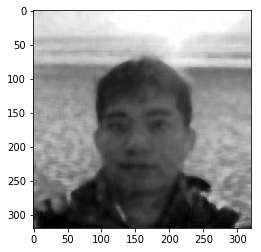

In [13]:
i_m = med_filter(i_n)
imshow(i_m, cmap='gray')

## Extract Features

In [14]:
# Sobel Edge Detection
def edge_sobel(image):
    from scipy import ndimage
    import skimage.color as sc
    import numpy as np
    image = sc.rgb2gray(image) # convert color image to gray scale
    dx = ndimage.sobel(image, 1) # horizontal drivative
    dy = ndimage.sobel(image, 0) # vertical derivative
    mag = np.hypot(dx, dy) # magnitude
    print(mag[0].max())
    mag *= 255.0 / np.amax(mag) # normalize (Q&D)
    print(mag[0].max())
    mag = mag.astype(np.uint8)
    return mag

0.1878200639672883
29.754140459037984


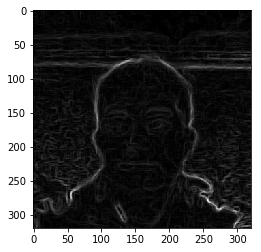

In [15]:
i_edge = edge_sobel(i_m)
imshow(i_edge, cmap='gray')

## Corner Detection

In [16]:
def corner_harr(im, min_distance = 10):
    from skimage.feature import corner_harris, corner_peaks
    mag = corner_harris(im)
    return corner_peaks(mag, min_distance = min_distance)

In [17]:
harris = corner_harr(i_eq, 10)

In [18]:
def plot_harr(im, harris, markersize = 20, color = 'red'):
    import matplotlib.pyplot as plt
    import numpy as np
    fig = plt.figure(figsize=(6,6))
    fig.clf()
    ax = fig.gca()
    ax.imshow(np.array(im).astype(float), cmap='gray')
    ax.plot(harris[:, 1], harris[:, 0], 'r+', color = color, markersize = markersize)
    plt.show()
    return 'Done'

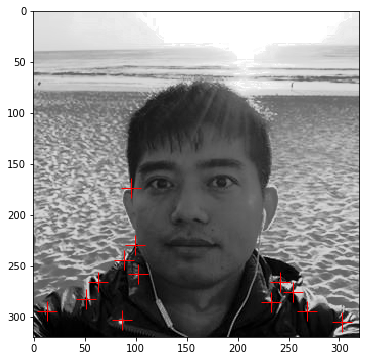

'Done'

In [19]:
plot_harr(i_eq, harris)